In [5]:
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset

In [141]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

import logging
tf.get_logger().setLevel(logging.ERROR)
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Activation,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import cv2
import pickle
import random 
import time
import zipfile
from shutil import copyfile


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical, plot_model

## Import train dataset

In [23]:
X_train, y_train = read_hoda_dataset(dataset_path='Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)

X_val = X_train[45000:]
y_val = y_train[45000:]
X_train = X_train[:45000]
y_train = y_train[:45000]

In [145]:
X_train.shape

(45000, 1024)

In [146]:
X_val.shape

(15000, 1024)

## Import Test dataset

In [26]:
X_test, y_test = read_hoda_dataset(dataset_path='Test 20000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)

In [148]:
X_test.shape

(20000, 1024)

## reshape X_train , X_val,X_test

In [149]:
X_train = X_train.reshape(X_train.shape[0], 32, 32)
X_test = X_test.reshape(X_test.shape[0], 32,32)
X_val=X_val.reshape(X_val.shape[0], 32,32)

In [150]:
X_train.shape

(45000, 32, 32)

## Showing X_train

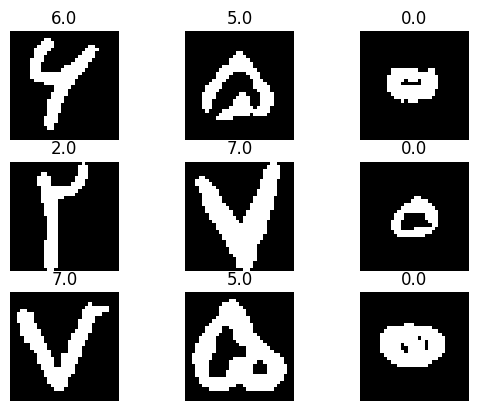

In [153]:
for i in range(9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i].squeeze(),cmap='gray' )
    plt.axis('off')
    plt.title(y_train[i])

In [154]:
y_train.dtype

dtype('float32')

## Showing X_test

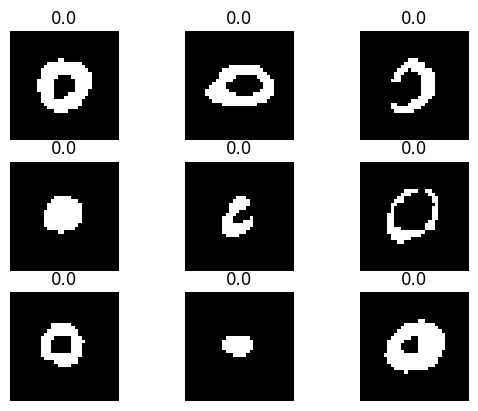

In [157]:
for i in range(9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_test[i].squeeze(),cmap='gray' )
    plt.axis('off')
    plt.title(y_test[i])

In [158]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)


In [159]:
X_train.shape

(45000, 32, 32, 1)

## Normalization

### The type of X_train ,X_test,X_val should be float64 and for Y group should be uint8

In [160]:
X_train, X_val, X_test = X_train / 255, X_val / 255, X_test/ 255

In [161]:
y_train.shape

(45000,)

In [162]:
y_train.dtype

dtype('float32')

In [27]:
y_train = y_train.astype('uint8')
y_test = y_test.astype('uint8')
y_val = y_val.astype('uint8')

In [165]:
y_train.shape

(45000,)

## Identify the class of digits

In [28]:
class_names = [0.0, 1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
class_names[y_train[0]]

6.0

In [168]:
y_test.shape

(20000,)

# 1.Sequentional

In [169]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[32, 32]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

In [170]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 300)               307500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 338,610
Trainable params: 338,610
Non-trainable params: 0
_________________________________________________________________


In [171]:
model.layers

In [172]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

In [173]:
history = model.fit(X_train, y_train, epochs=10,
validation_data=(X_val, y_val))

2023-02-14 21:28:11.395614: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.


Epoch 1/10
1406/1407 [============================>.] - ETA: 0s - loss: 0.4461 - accuracy: 0.8812

2023-02-14 21:28:35.561371: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 61440000 exceeds 10% of free system memory.


1407/1407 [==============================] - 24s 14ms/step - loss: 0.4461 - accuracy: 0.8812 - val_loss: 0.2013 - val_accuracy: 0.9443
Epoch 2/10
1407/1407 [==============================] - 19s 14ms/step - loss: 0.1679 - accuracy: 0.9506 - val_loss: 0.1552 - val_accuracy: 0.9593
Epoch 3/10
1407/1407 [==============================] - 19s 14ms/step - loss: 0.1329 - accuracy: 0.9619 - val_loss: 0.1369 - val_accuracy: 0.9607
Epoch 4/10
1407/1407 [==============================] - 22s 16ms/step - loss: 0.1091 - accuracy: 0.9696 - val_loss: 0.1150 - val_accuracy: 0.9671
Epoch 5/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.0908 - accuracy: 0.9745 - val_loss: 0.1024 - val_accuracy: 0.9711
Epoch 6/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.0765 - accuracy: 0.9781 - val_loss: 0.0865 - val_accuracy: 0.9760
Epoch 7/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.0642 - accuracy: 0.9823 - val_loss: 0.0805 - val_accura

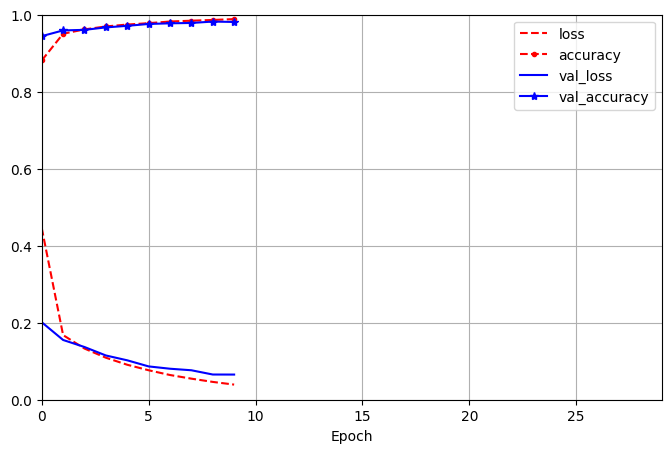

In [174]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True,
xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

## Test Model with X_test

In [176]:
X_new = X_test
y_proba = model.predict(X_new)
print(y_proba.round(2))

2023-02-14 21:33:10.831609: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 81920000 exceeds 10% of free system memory.


625/625 [==============================] - 3s 4ms/step
[[1.   0.   0.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 [0.76 0.05 0.   ... 0.01 0.   0.  ]
 ...
 [0.   0.3  0.   ... 0.   0.   0.61]
 [0.   0.   0.   ... 0.   0.   1.  ]
 [0.   0.   0.   ... 0.   0.   1.  ]]


In [177]:
y_pred = y_proba.argmax(axis=1)
y_pred = y_proba.argmax(axis=-1)

In [178]:
np.array(class_names)[y_pred]

array([0., 0., 0., ..., 9., 9., 9.])

In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2000
           1       0.97      0.99      0.98      2000
           2       0.91      0.96      0.94      2000
           3       0.94      0.92      0.93      2000
           4       0.96      0.92      0.94      2000
           5       0.98      0.98      0.98      2000
           6       0.97      0.96      0.96      2000
           7       0.99      0.96      0.98      2000
           8       0.98      0.98      0.98      2000
           9       0.96      0.97      0.96      2000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



# Saving model

In [3]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [181]:
# Save the model
filepath = 'Sequentional'
save_model(model, filepath)

# Load model

In [182]:
filepath = 'Sequentional'
model_S = load_model(filepath, compile = True)

# ****************************************************************************************


# 2.Functional

In [183]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


### The shape of images are diffrent from sequentional model so read dataset again 

In [185]:
X_train1, y_train1 = read_hoda_dataset(dataset_path='Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)

X_val1 = X_train1[45000:]/255
y_val1 = y_train1[45000:]
X_train1 = X_train1[:45000]/255
y_train1 = y_train1[:45000]

In [6]:
X_test1, y_test1 = read_hoda_dataset(dataset_path='Test 20000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
X_test1 = X_test1/255
y_test1 = y_test1

In [186]:
X_train1.shape

(45000, 1024)

In [13]:
X_test1, y_test1 = read_hoda_dataset(dataset_path='Test 20000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
X_test1=X_test1/255
X_test1 = X_test1.reshape(X_test1.shape[0], 32, 32)

In [14]:
X_test1.shape

(20000, 32, 32)

In [231]:
inputs = keras.Input(shape=(1024,))

In [232]:
inputs.shape


TensorShape([None, 1024])

In [233]:
inputs.dtype

tf.float32

In [234]:
hidden1 = layers.Dense(300, activation="relu")(inputs)
hidden2 = layers.Dense(100, activation="relu")(hidden1)
hidden3 = layers.Dense(100, activation="relu")(hidden2)
concat = layers.concatenate([inputs, hidden3])
outputs = layers.Dense(10, activation="softmax")(concat)


In [235]:
model_F = keras.Model(inputs=inputs, outputs=outputs,name="hoda")


In [236]:
model_F.summary()

Model: "hoda"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1024)]       0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 300)          307500      ['input_2[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 100)          30100       ['dense_7[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 100)          10100       ['dense_8[0][0]']                
                                                                                               

In [237]:
model_F.compile(loss="sparse_categorical_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

In [238]:
history_F = model_F.fit(X_train1, y_train1, epochs=10,
validation_data=(X_val1, y_val1))

Epoch 1/10
1407/1407 [==============================] - 28s 17ms/step - loss: 0.4907 - accuracy: 0.8478 - val_loss: 0.2168 - val_accuracy: 0.9397
Epoch 2/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.1725 - accuracy: 0.9505 - val_loss: 0.1486 - val_accuracy: 0.9591
Epoch 3/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.1205 - accuracy: 0.9652 - val_loss: 0.1142 - val_accuracy: 0.9666
Epoch 4/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0877 - accuracy: 0.9750 - val_loss: 0.0924 - val_accuracy: 0.9717
Epoch 5/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0677 - accuracy: 0.9800 - val_loss: 0.0776 - val_accuracy: 0.9785
Epoch 6/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.0682 - val_accuracy: 0.9795
Epoch 7/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.0442 - accuracy: 0.9868 - val_loss: 0.0752 -

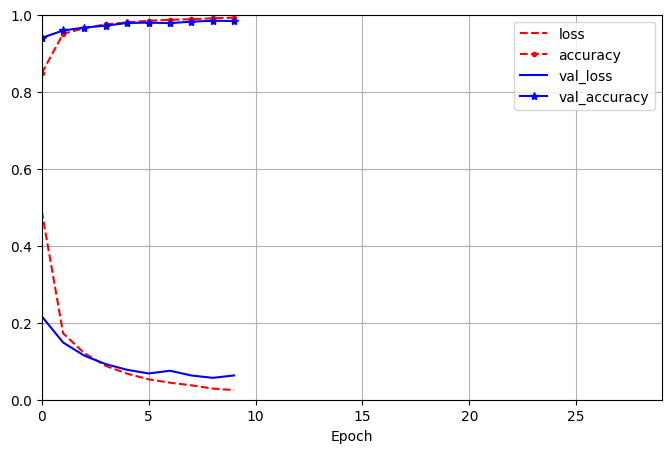

In [239]:
pd.DataFrame(history_F.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True,
xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

# Save model

In [240]:
# Save the model
filepath = 'Functional'
save_model(model, filepath)

In [9]:
filepath = 'Save_Functional'
model_F1 = load_model(filepath, compile = True)

# Test model with X_test1

In [16]:
X_new1 = X_test1
y_proba1 = model_F1.predict(X_new1)
print(y_proba1.round(2))

 13/625 [..............................] - ETA: 2s 

2023-02-15 17:07:23.598943: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 81920000 exceeds 10% of free system memory.


625/625 [==============================] - 3s 4ms/step
[[1.   0.   0.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 [0.76 0.05 0.   ... 0.01 0.   0.  ]
 ...
 [0.   0.3  0.   ... 0.   0.   0.61]
 [0.   0.   0.   ... 0.   0.   1.  ]
 [0.   0.   0.   ... 0.   0.   1.  ]]


In [17]:
y_pred1 = y_proba1.argmax(axis=1)
y_pred1 = y_proba1.argmax(axis=-1)

In [29]:
np.array(class_names)[y_pred1]

array([0., 0., 0., ..., 9., 9., 9.])

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2000
         1.0       0.97      0.99      0.98      2000
         2.0       0.91      0.96      0.94      2000
         3.0       0.94      0.92      0.93      2000
         4.0       0.96      0.92      0.94      2000
         5.0       0.98      0.98      0.98      2000
         6.0       0.97      0.96      0.96      2000
         7.0       0.99      0.96      0.98      2000
         8.0       0.98      0.98      0.98      2000
         9.0       0.96      0.97      0.96      2000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



# Compare two models

In [241]:
print('Sequentional')
history_dataframe = pd.DataFrame(history.history)
history_dataframe

Sequentional


,loss,accuracy,val_loss,val_accuracy
0,0.446119,0.881200,0.201282,0.944333
1,0.167856,0.950600,0.155186,0.959267
2,0.132914,0.961889,0.136909,0.960667
3,0.109112,0.969556,0.114958,0.967067
4,0.090840,0.974467,0.102356,0.971133
5,0.076526,0.978067,0.086527,0.976000
6,0.064182,0.982333,0.080500,0.977667
7,0.054709,0.984511,0.076516,0.978600
8,0.046287,0.986378,0.065470,0.982200
9,0.039275,0.988644,0.065344,0.981200


In [246]:
print('Functional')
history_dataframe1 = pd.DataFrame(history_F.history)
history_dataframe1

Functional


,loss,accuracy,val_loss,val_accuracy
0,0.490700,0.847800,0.216785,0.939733
1,0.172518,0.950533,0.148622,0.959133
2,0.120507,0.965156,0.114153,0.966600
3,0.087692,0.974978,0.092361,0.971733
4,0.067676,0.979978,0.077592,0.978533
5,0.052891,0.984289,0.068216,0.979467
6,0.044225,0.986756,0.075246,0.978200
7,0.037320,0.988444,0.062943,0.981933
8,0.028915,0.990733,0.056862,0.984333
9,0.024907,0.992444,0.063048,0.983667


## The functional model with 3 hidden layer has 0.99% accoracy 

# ************************************************************************************************************************

## Predict my handswriting

In [99]:
img_path = "My/"

In [100]:
lable=['0','1','2','3','4','5','6','7','8','9']


In [101]:
img_list = []
label_list = []
for label in lable:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)
        
df = pd.DataFrame({'img':img_list, 'label':label_list})
df

,img,label
0,My/0/0.jpg,0
1,My/1/1.jpg,1
2,My/2/2.jpg,2
3,My/3/3.jpg,3
4,My/4/4.jpg,4
5,My/5/5.jpg,5
6,My/6/6.jpg,6
7,My/7/7.jpg,7
8,My/8/8.jpg,8
9,My/9/9.jpg,9


In [102]:
df['label']=df.label.astype('uint8')


In [103]:
df['label'].dtype

dtype('uint8')

In [104]:
df['img'].shape

(10,)

In [105]:
class_names = [0.0, 1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
class_names[df['label'][6]]

6.0

In [106]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [107]:
X = []
for img in df['img']:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (32, 32))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = gray/255
    X.append(gray)

In [109]:
X=np.asarray(X)

In [110]:
X.shape

(10, 32, 32)

In [112]:
X.dtype

dtype('float64')

In [113]:
X= X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [114]:
X.shape

(10, 32, 32, 1)

In [115]:
y=df['label']

In [116]:
y=np.asarray(y)

In [248]:
y.dtype

dtype('uint8')

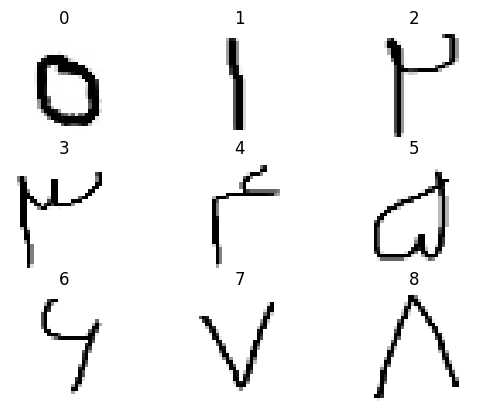

In [249]:
for i in range(9):
    plt.subplot(330 + (i+1))
    plt.imshow(X[i].squeeze(),cmap='gray' )
    plt.axis('off')
    plt.title(y[i])

In [123]:
X_n = X
y_proba = model_S.predict(X_n)
y_proba.round(2)

1/1 [==============================] - 0s 88ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [124]:
y_predi = y_proba.argmax(axis=1)

In [125]:
y_predi = y_proba.argmax(axis=-1)

In [126]:
y_predi

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [127]:
Y_NEW=y[:3]
Y_NEW

array([0, 1, 2], dtype=uint8)

### Unfortunately the model can not predict correctly and this may be becuase to the lack of similarity between the new handwritings and the model's handwritings

# Predict with remainingSamples with Sequentional

In [215]:
X_remaining, Y_remaining = read_hoda_dataset('RemainingSamples.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=True,
                                             reshape=True)

In [216]:
X_remaining=X_remaining.reshape(X_remaining.shape[0], 32, 32)
X_remaining = X_remaining.reshape(X_remaining.shape[0], X_remaining.shape[1], X_remaining.shape[2], 1)/255


In [217]:
Y_remaining = Y_remaining.astype('uint8')


In [223]:
X_n = X_remaining[:3]
y_proba = model_S.predict(X_n)
y_proba.round(2)

1/1 [==============================] - 0s 144ms/step


array([[0.  , 0.  , 0.03, 0.96, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.81, 0.  , 0.  , 0.18]],
      dtype=float32)

In [224]:
y_predi = y_proba.argmax(axis=1)

In [225]:
y_predi

array([3, 1, 6])

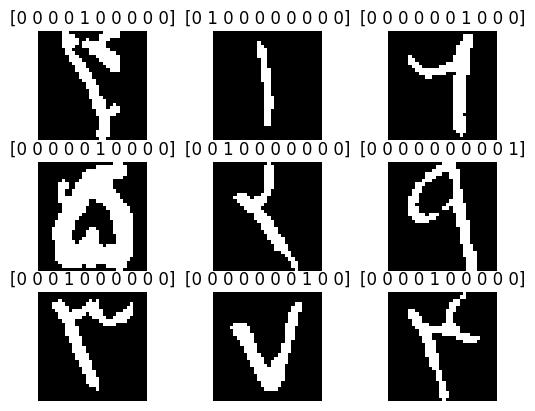

In [228]:
for i in range(9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_remaining[i].squeeze(),cmap='gray' )
    plt.axis('off')
    plt.title(Y_remaining[i])